In [2]:
#p38
from sklearn.datasets import load_iris #scikit-learn
iris_dataset = load_iris()

In [4]:
print(iris_dataset.keys()) #어떤 항목이 있는지 보려면 너가 가진 key를 보여달라고 명령

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
print(type(iris_dataset['data']))

<class 'numpy.ndarray'>


In [9]:
print(iris_dataset['target'])#150개의 정보가 50개씩 정렬되고 있음

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris_dataset['data'][0:2]) #0번 꽃

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


In [11]:
print(iris_dataset['data'][50:52]) #1번 꽃

[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]]


In [12]:
print(iris_dataset['data'][100:102]) #2번 꽃

[[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]]


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0) # y_test : 값이 하나인 scaler개념으로 소문자 사용

In [16]:
X_train.shape #112송의 train set을 뽑음

(112, 4)

In [17]:
y_train.shape #1차원의 데이터이기 때문에 하나만 나옴

(112,)

In [18]:
X_test.shape

(38, 4)

In [19]:
y_test.shape

(38,)

In [20]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

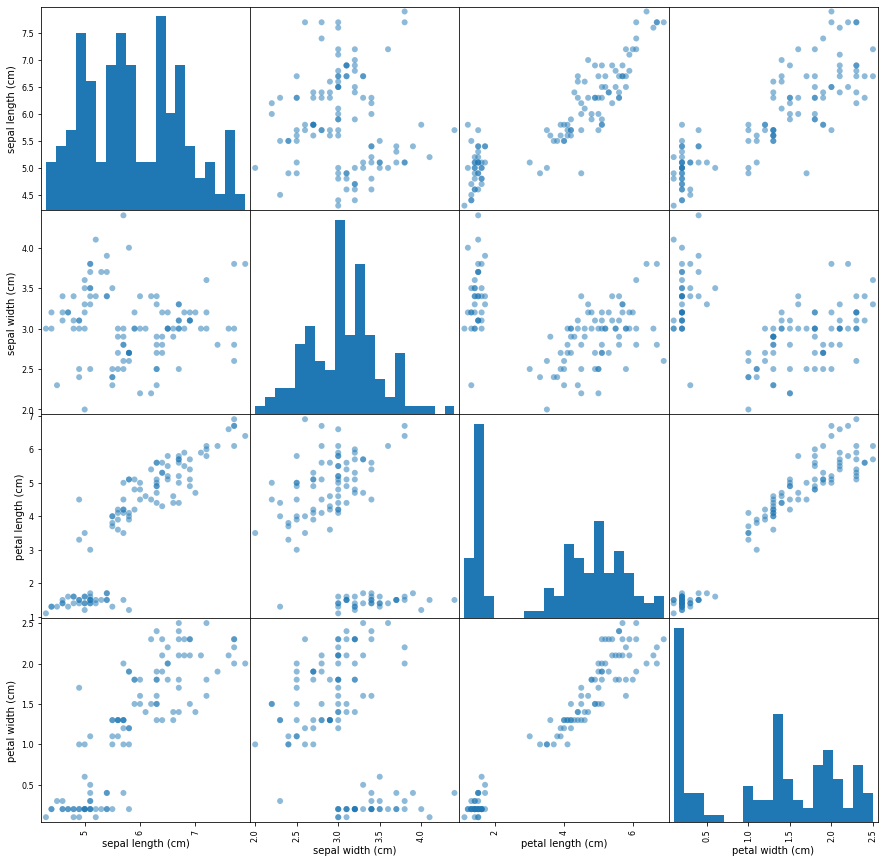

In [24]:
import pandas as pd
iris_df = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(15,15),marker='o',hist_kwds={'bins':20})

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train) # knn이 훈련의 결과를 가지고 있음

KNeighborsClassifier(n_neighbors=1)

In [27]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])

In [28]:
prediction = knn.predict(X_new)
prediction #위의 값을 넣었을 때 몇번 꽃이라고 예측할것인지

array([0])

In [29]:
iris_dataset['target_names'][prediction] #타켓이름은 setosa이다.

array(['setosa'], dtype='<U10')

In [30]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [31]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [32]:
sc = knn.score(X_test, y_test)

In [34]:
error_cnt = (1.0-sc)*y_test.shape[0]
error_cnt

0.9999999999999989

In [35]:
# !pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=8163098e6843f5bbbcf201967d5815526a57a168225b31e0cca170f8c05ef7af
  Stored in directory: c:\users\cpb06gamen\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [36]:
import mglearn

In [37]:
import matplotlib.pyplot as plt

In [38]:
X, y = mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [40]:
X[:5] #[ 9.96346605,  4.59676542] : 한 점의 좌표

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977]])

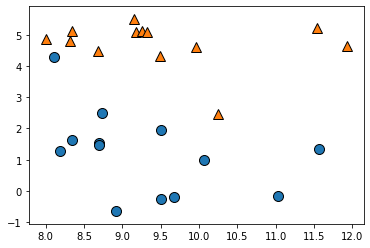

In [42]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

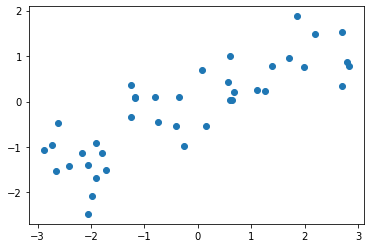

In [44]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


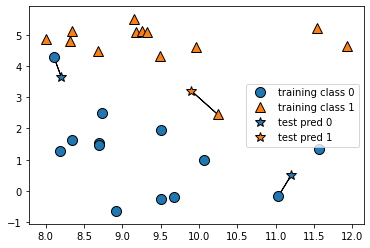

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


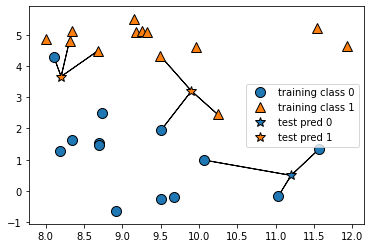

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


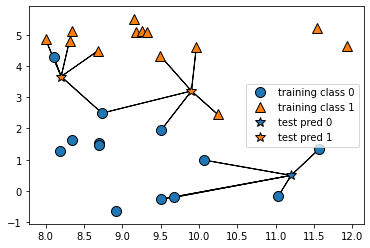

In [47]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [48]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [50]:
# knn적용
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0])

In [52]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [53]:
clf.score(X_test, y_test)

0.8571428571428571

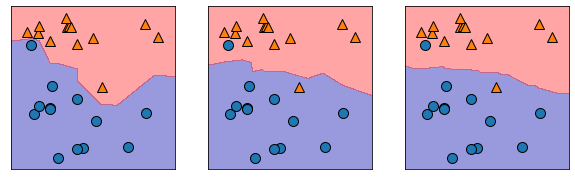

In [56]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    

In [58]:
from sklearn.datasets import load_breast_cancer

In [60]:
cancer = load_breast_cancer()

In [61]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, 
random_state=66)

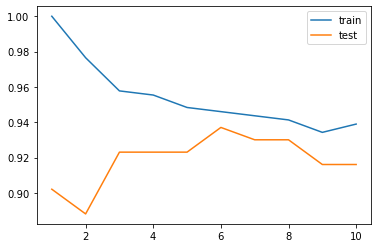

In [68]:
train_res = []
test_res =[]
for n in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    train_res.append(clf.score(X_train,y_train))
    test_res.append(clf.score(X_test,y_test))
plt.plot(range(1,11),train_res,label='train')
plt.plot(range(1,11),test_res,label='test')
plt.legend()
plt.show()

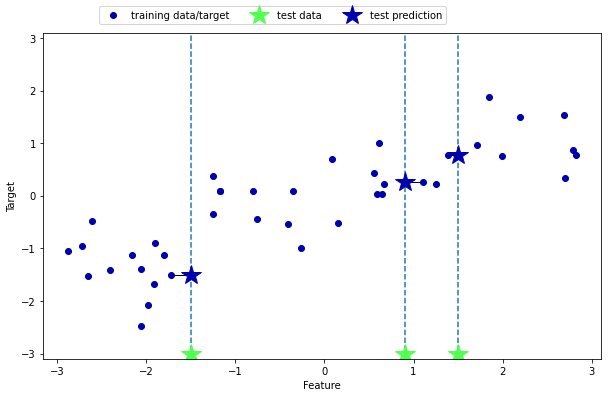

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(
X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print(X_test.reshape(-1,10))
print(reg.predict(X_test))

[[-1.24713211  0.67111737  1.71105577 -2.06388816 -2.87649303 -1.89957294
   0.55448741  2.81945911 -0.40832989 -2.72129752]]
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [71]:
reg.score(X_test,y_test)

0.8344172446249605